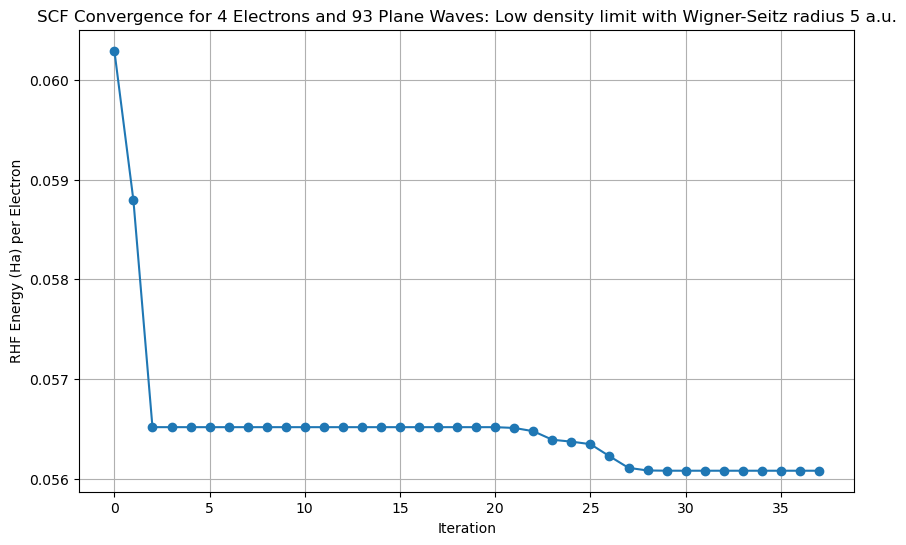

In [4]:
import matplotlib.pyplot as plt

# Read the data from the text file
iterations = []
energies = []
n_elec = None
num_plane_waves = None

with open('scf_results.txt', 'r') as file:
    for line in file:
        if line.startswith("Number of electrons:"):
            n_elec = int(line.split()[-1])
        elif line.startswith("Number of plane waves:"):
            num_plane_waves = int(line.split()[-1])
        else:
            iteration, energy = line.split()
            iterations.append(int(iteration))
            energies.append(float(energy))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(iterations, energies, marker='o')
plt.xlabel('')
plt.ylabel('RHF Energy (Ha) per Electron')
plt.title(f'SCF Convergence for {n_elec} Electrons and {num_plane_waves} Plane Waves: Low density limit with Wigner-Seitz radius 5 a.u.')
plt.grid(True)
plt.show()


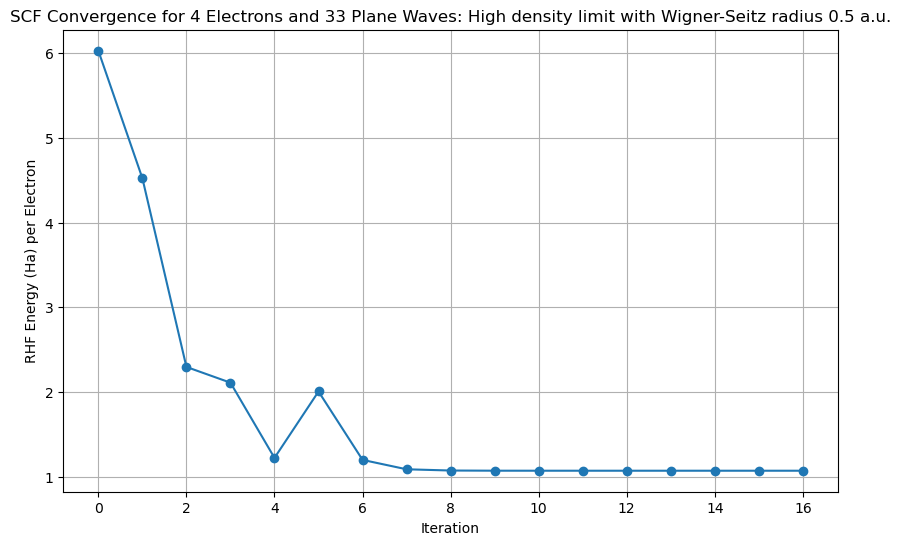

In [2]:
import matplotlib.pyplot as plt

# Read the data from the text file
iterations = []
energies = []
n_elec = None
num_plane_waves = None

with open('scf_results_dense.txt', 'r') as file:
    for line in file:
        if line.startswith("Number of electrons:"):
            n_elec = int(line.split()[-1])
        elif line.startswith("Number of plane waves:"):
            num_plane_waves = int(line.split()[-1])
        else:
            iteration, energy = line.split()
            iterations.append(int(iteration))
            energies.append(float(energy))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('RHF Energy (Ha) per Electron')
plt.title(f'SCF Convergence for {n_elec} Electrons and {num_plane_waves} Plane Waves: High density limit with Wigner-Seitz radius 0.5 a.u.')
plt.grid(True)
plt.show()


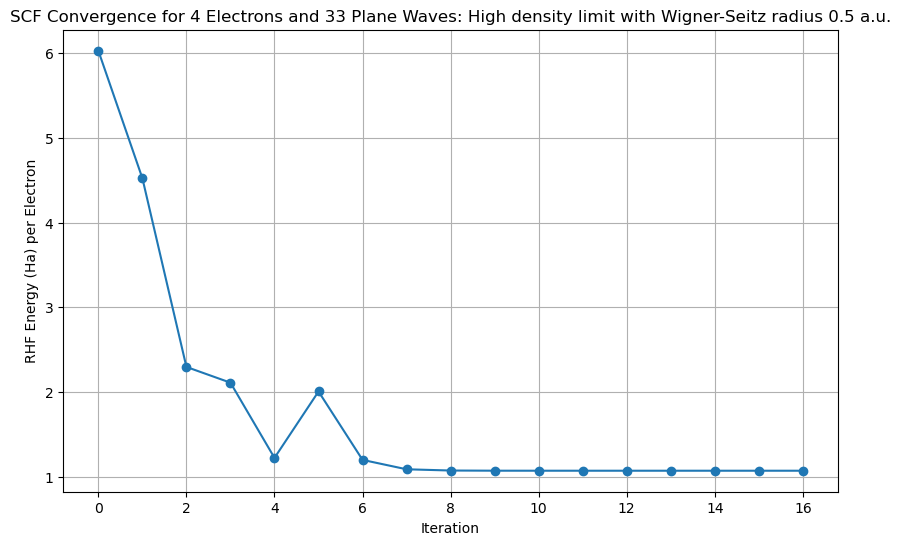

In [ ]:
import matplotlib.pyplot as plt

# Read the data from the text file
iterations = []
energies = []
n_elec = None
num_plane_waves = None

with open('scf_results_dense.txt', 'r') as file:
    for line in file:
        if line.startswith("Number of electrons:"):
            n_elec = int(line.split()[-1])
        elif line.startswith("Number of plane waves:"):
            num_plane_waves = int(line.split()[-1])
        else:
            iteration, energy = line.split()
            iterations.append(int(iteration))
            energies.append(float(energy))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('RHF Energy (Ha) per Electron')
plt.title(f'SCF Convergence for {n_elec} Electrons and {num_plane_waves} Plane Waves: High density limit with Wigner-Seitz radius 0.5 a.u.')
plt.grid(True)
plt.show()


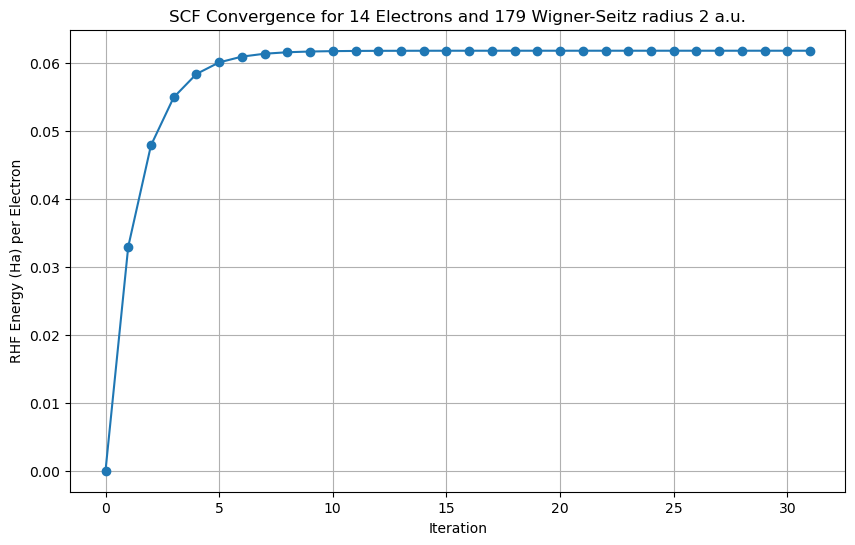

In [2]:
import matplotlib.pyplot as plt

# Read the data from the text file
iterations = []
energies = []
n_elec = None
num_plane_waves = None

with open('scf_ld.txt', 'r') as file:
    for line in file:
        if line.startswith("Number of electrons:"):
            n_elec = int(line.split()[-1])
        elif line.startswith("Number of plane waves:"):
            num_plane_waves = int(line.split()[-1])
        else:
            iteration, energy = line.split()
            iterations.append(int(iteration))
            energies.append(float(energy))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('RHF Energy (Ha) per Electron')
plt.title(f'SCF Convergence for {n_elec} Electrons and {num_plane_waves} Wigner-Seitz radius 2 a.u.')
plt.grid(True)
plt.show()


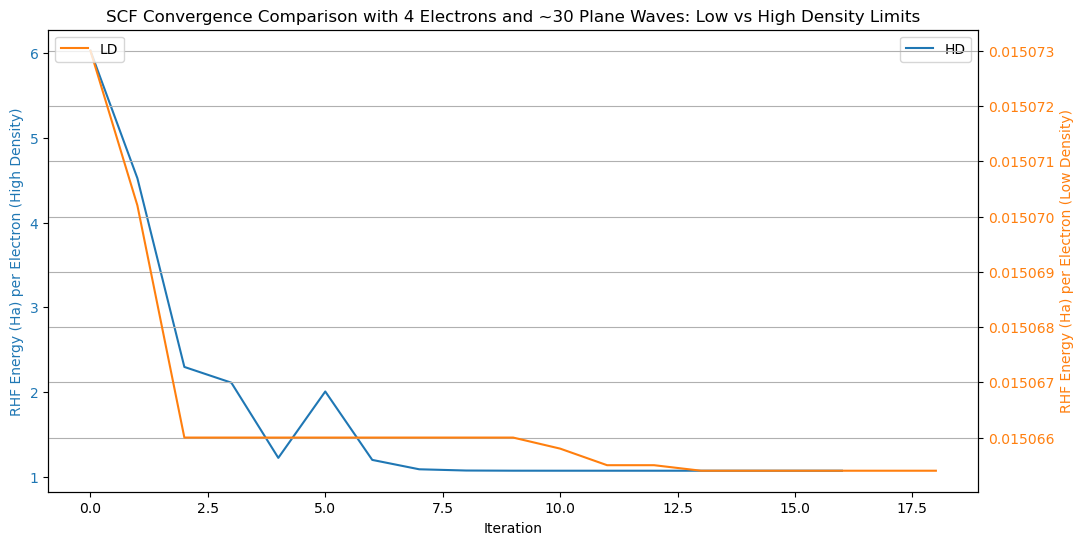

In [8]:
import matplotlib.pyplot as plt

def parse_scf_file(filename):
    data = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
        i = 0
        while i < len(lines):
            if lines[i].startswith("Number of electrons:"):
                n_elec = int(lines[i].split()[-1])
                i += 1
                if lines[i].startswith("Number of plane waves:"):
                    n_pw = int(lines[i].split()[-1])
                    i += 1
                    iterations = []
                    energies = []
                    while i < len(lines) and not lines[i].startswith("Number of electrons:"):
                        iter_energy = lines[i].split()
                        iterations.append(int(iter_energy[0]))
                        energies.append(float(iter_energy[1]))
                        i += 1
                    data[n_elec] = (n_pw, iterations, energies)
            else:
                i += 1
    return data

# Parse data from both files
ld_data = parse_scf_file('scf_ld.txt')
hd_data = parse_scf_file('scf_hd.txt')

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot high density data on the primary y-axis
for n_elec in hd_data:
    if n_elec in ld_data:
        n_pw_hd, iterations_hd, energies_hd = hd_data[n_elec]
        ax1.plot(iterations_hd, energies_hd, label=f'HD')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('RHF Energy (Ha) per Electron (High Density)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper right')

# Create a secondary y-axis for low density data
ax2 = ax1.twinx()
for n_elec in ld_data:
    n_pw_ld, iterations_ld, energies_ld = ld_data[n_elec]
    ax2.plot(iterations_ld, energies_ld, label=f'LD', color='tab:orange')
ax2.set_ylabel('RHF Energy (Ha) per Electron (Low Density)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper left')

plt.title('SCF Convergence Comparison with 4 Electrons and ~30 Plane Waves: Low vs High Density Limits')
plt.grid(True)

# Save and show the plot
plt.savefig('scf_convergence_comparison.png')
plt.show()


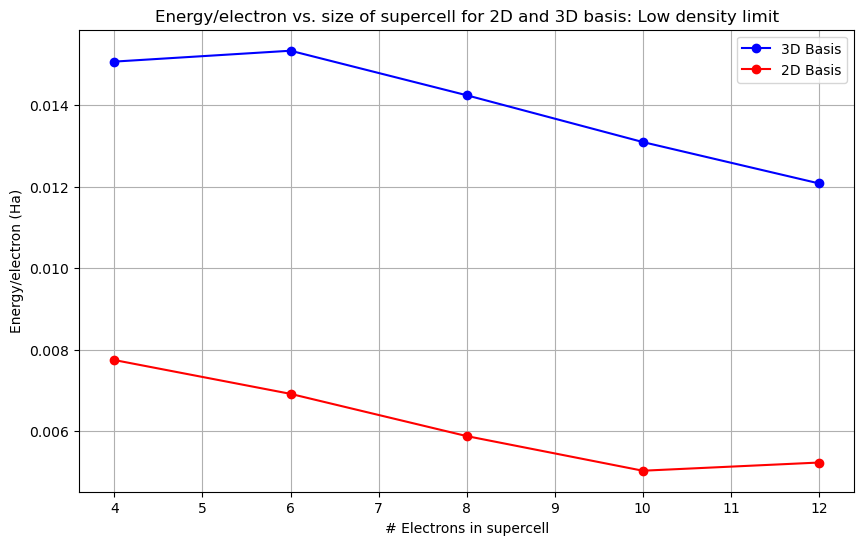

In [3]:
import matplotlib.pyplot as plt

# Initialize data storage
n_elec = []
energy_3d = []
energy_2d = []

# Read the data from the file
with open('scf_dimension.txt', 'r') as file:
    lines = file.readlines()
    
    for i in range(0, len(lines), 3):  # Each block has 3 lines
        if "Number of electrons:" in lines[i]:
            # Extract number of electrons
            n = int(lines[i].split()[-1])
            n_elec.append(n)
            
            # Extract energies
            energy_3d.append(float(lines[i+1].strip()))
            energy_2d.append(float(lines[i+2].strip()))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(n_elec, energy_3d, marker='o', label='3D Basis', color='b')
plt.plot(n_elec, energy_2d, marker='o', label='2D Basis', color='r')

# Adding titles and labels
plt.title('Energy/electron vs. size of supercell for 2D and 3D basis: Low density limit')
plt.xlabel('# Electrons in supercell')
plt.ylabel('Energy/electron (Ha)')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.show()
